<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M13_Exercicio_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# lendo o arquivo 'estados-bruto.xml', utilizando o xml parser chamado lxml
import xml.etree.ElementTree as et
from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')

<ipython-input-2-6eb03c658e7a>:7: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')


In [3]:
# Visualizando  os resultados
fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [4]:
#usando find_all para limpar os dados e criar uma lista com eles
dados = []
for estado in fonte.find_all('estado'):
  nome_estado = estado.nome.text.strip()
  sigla = estado.sigla.text.strip()
  regiao = estado.regiao.text.strip()
  dados.append((nome_estado, sigla, regiao))

print(list(dados))

[('ACRE', 'AC', 'NORTE'), ('ALAGOAS', 'AL', 'NORDESTE'), ('AMAPA', 'AP', 'NORTE'), ('AMAZONAS', 'AM', 'NORTE'), ('BAHIA', 'BA', 'NORDESTE'), ('CEARA', 'CE', 'NORDESTE'), ('DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'), ('ESPIRITO SANTO', 'ES', 'SUDESTE'), ('GOIAS', 'GO', 'CENTRO-OESTE'), ('MARANHAO', 'MA', 'NORDESTE'), ('MATO GROSSO', 'MT', 'CENTRO-OESTE'), ('MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'), ('PARA', 'PA', 'NORTE'), ('PARAIBA', 'PB', 'NORDESTE'), ('PARANA', 'PR', 'SUL'), ('PERNAMBUCO', 'PE', 'NORDESTE'), ('PIAUI', 'PI', 'NORDESTE'), ('RIO DE JANEIRO', 'RJ', 'SUDESTE'), ('RIO GRANDE DO NORTE', 'RN', 'NORDESTE'), ('RIO GRANDE DO SUL', 'RS', 'SUL'), ('RONDONIA', 'RO', 'NORTE'), ('RORAIMA', 'RR', 'NORTE'), ('SANTA CATARINA', 'SC', 'SUL'), ('SAO PAULO', 'SP', 'SUDESTE'), ('SERGIPE', 'SE', 'NORDESTE'), ('TOCANTINS', 'TO', 'NORTE'), ('MINAS GERAIS', 'MG', 'SUDESTE')]


In [5]:
# criando um arquivo onde serão escritas as listas e o cabeçalho

import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open ('estados-limpo.csv', mode='w', newline='', encoding='utf8')\
 as arquivo:
  writer = csv.writer(arquivo, delimiter=',')
  writer.writerow(['UF','sigla','regiao']) #criando o cabeçalho
  writer.writerows(dados)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [6]:
# lendo o arquivo csv como um df

import pandas as pd

arquivo = 'cidades-bruto.csv'
cidades_df = pd.read_csv('cidades-bruto.csv', delimiter=',')

In [7]:
# visualizando o df
cidades_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [8]:
# escolhendo as colunas de interesse para trabalhar
colunas_interesse = ['UF','nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']
interesse_df = cidades_df[colunas_interesse]
interesse_df

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [9]:
# criando um novo arquivo apenas com as colunas à serem trabalhadas

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

interesse_df.to_csv(NOME_ARQUIVO_DESTINO, encoding='utf8', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [10]:
# lendo e visualizando as informações do primeiro .csv
estados_df = pd.read_csv('estados-limpo.csv')
estados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      27 non-null     object
 1   sigla   27 non-null     object
 2   regiao  27 non-null     object
dtypes: object(3)
memory usage: 776.0+ bytes


In [11]:
#lendo e visualizando as informações do segundo .csv
cidades_df = pd.read_csv('cidades-limpo.csv')
cidades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UF             5566 non-null   object 
 1   nome           5565 non-null   object 
 2   PIB            5566 non-null   float64
 3   Pop_est_2009   5566 non-null   int64  
 4   PIB_percapita  5566 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 217.5+ KB


In [12]:
#criando um df com as colunas em comum para realizar o join
pd.concat([cidades_df[['UF']], estados_df[['UF']]])

,UF
0,BAHIA
1,RIO GRANDE DO SUL
2,ESPIRITO SANTO
3,MINAS GERAIS
4,PIAUÍ
...,...
22,SANTA CATARINA
23,SAO PAULO
24,SERGIPE
25,TOCANTINS


In [13]:
# criando um novo arquivo que recebera o merge dos df's e visualizando-o
brasil_csv = pd.merge(left=cidades_df, right=estados_df, on='UF', how='outer')
brasil_csv.to_csv('brasil.csv', sep=';',encoding='utf8', index=False)
brasil_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UF             5576 non-null   object 
 1   nome           5565 non-null   object 
 2   PIB            5566 non-null   float64
 3   Pop_est_2009   5566 non-null   float64
 4   PIB_percapita  5566 non-null   float64
 5   sigla          3227 non-null   object 
 6   regiao         3227 non-null   object 
dtypes: float64(3), object(4)
memory usage: 348.5+ KB


In [14]:
# código de outra tentativa de inner join

#brasil = 'brasil.csv'
#cidades = pd.read_csv('cidades-limpo.csv')
#colunas_cidades = 'UF'
#estados = pd.read_csv('estados-limpo.csv')
#colunas_estados = 'nome'
#brasil_merge = pd.merge(estados, cidades, on='UF', how='inner')
#brasil_merge.to_csv('brasil.csv',sep=';',encoding='utf8', index=False)


In [15]:
# verificando os valores null
brasil_csv.isnull().any()

UF               False
nome              True
PIB               True
Pop_est_2009      True
PIB_percapita     True
sigla             True
regiao            True
dtype: bool

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [16]:
# abrindo o novo arquivo como df
brasil_df= pd.read_csv('brasil.csv', delimiter=';')
brasil_df

,UF,nome,PIB,Pop_est_2009,PIB_percapita,sigla,regiao
0,BAHIA,Tremedal,57883.992188,18433.0,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,23558.447266,7884.0,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,74997.406250,7893.0,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,92903.820312,20668.0,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,62366.886719,19410.0,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5571,PARAIBA,NaN,NaN,NaN,NaN,PB,NORDESTE
5572,PARANA,NaN,NaN,NaN,NaN,PR,SUL
5573,PIAUI,NaN,NaN,NaN,NaN,PI,NORDESTE
5574,RONDONIA,NaN,NaN,NaN,NaN,RO,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [17]:
# utilizei o método nlargest e selecionei apenas as colunas necessárias
brasil_df.nlargest(10,'Pop_est_2009')[['nome','Pop_est_2009']]

,nome,Pop_est_2009
3278,São Paulo,11037593.0
4512,Rio de Janeiro,6186710.0
44,Salvador,2998056.0
5565,Brasília,2606885.0
4228,Fortaleza,2505552.0
1736,Belo Horizonte,2452617.0
4860,Curitiba,1851215.0
3727,Manaus,1738641.0
2439,Recife,1561659.0
2628,Belém,1437600.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [18]:
top5_PIB_NORDESTE = brasil_df[brasil_df['regiao']=='NORDESTE'].sort_values(by='PIB', ascending=True).head(5)
top5_PIB_NORDESTE[['nome', 'PIB']]

,nome,PIB
5334,Viçosa,8834.245117
5485,João Dias,11670.412109
5382,Monte das Gameleiras,11909.322266
5427,Taboleiro Grande,12153.434570
5332,Pedra Preta,12639.967773


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [19]:
# escolhendo apenas o estado de São Paulo e organizando o resultado pelo PIB
top15_PIB_SP = brasil_df[brasil_df['UF'] == 'SÃO PAULO'].sort_values\
 (by='PIB', ascending=False).head(15)
top15_PIB_SP[['nome', 'PIB']] #visualizando apenas as colunas utilizadas

,nome,PIB
3278,São Paulo,389317152.0
3230,Guarulhos,32473828.0
3347,Campinas,31654720.0
3112,Osasco,31616452.0
2815,São Bernardo do Campo,28935768.0
3351,Barueri,26908070.0
2772,Santos,22546134.0
2999,São José dos Campos,22018042.0
3019,Jundiaí,16585137.0
2821,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [20]:
# selecionando apenas o estado de Santa Catarina, e depois somando a coluna PIB
PIB_SantaCatarina = (brasil_df.loc[brasil_df['sigla'] == 'SC'])
PIB_SantaCatarina = PIB_SantaCatarina['PIB'].sum()

print(f'O PIB do estado de Santa Catarina é de R$ {PIB_SantaCatarina}.')

O PIB do estado de Santa Catarina é de R$ 129806256.75195317.


 - Qual é o população da região sul?

In [21]:
# escolhendo apenas os estados da região Sul e somando seus habitantes
pop_sul = (brasil_df.loc[brasil_df['regiao'] == 'SUL'])
pop_sul = pop_sul['Pop_est_2009'].sum()

print(f'A população estatimada na região sul, em 2009, é de {pop_sul}')

A população estatimada na região sul, em 2009, é de 17032871.0


 - Qual é o PIB per capita médio das cidades do Mato Grosso do Sul?

In [22]:
# criando um df apenas com as cidades do MS para conta-lás
# somando o PIB per capita e dividindo-o pelo n° de cidades
cidades_MS = (brasil_df[brasil_df['sigla'] == 'MS'])
PIB_percapita_MS = cidades_MS['PIB_percapita'].sum()
PIPpc_medio_MS = PIB_percapita_MS/len(cidades_MS)

print(f'O PIB per capita médio das cidades do Mato Grasso do Sul é de \
{round(PIPpc_medio_MS,2)}, levando em conta suas {len(cidades_MS)} cidades')

O PIB per capita médio das cidades do Mato Grasso do Sul é de 14458.9, levando em conta suas 78 cidades


 - Qual é a população do Brasil?

In [23]:
# apenas somando toda a coluna de população
POP_brasil = brasil_df['Pop_est_2009'].sum()

print(f'A população estimada do Brasil em 2009, era de {POP_brasil}')

A população estimada do Brasil em 2009, era de 191501418.0


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [24]:
# criando um df para filtragem e criação do gráfico
pop_cidades_min = brasil_df.nsmallest(10,'Pop_est_2009')\
 [['nome','Pop_est_2009']]

print(pop_cidades_min)

                    nome  Pop_est_2009
3231                Borá         837.0
1486    Serra da Saudade         890.0
2284          Anhanguera        1018.0
4683          Araguainha        1115.0
3254       Nova Castilho        1122.0
3587  Oliveira de Fátima        1129.0
1940         Miguel Leão        1212.0
996      Cedro do Abaeté        1221.0
3538              Parari        1266.0
3621    Chapada de Areia        1273.0


Text(0, 0.5, 'Habitantes')

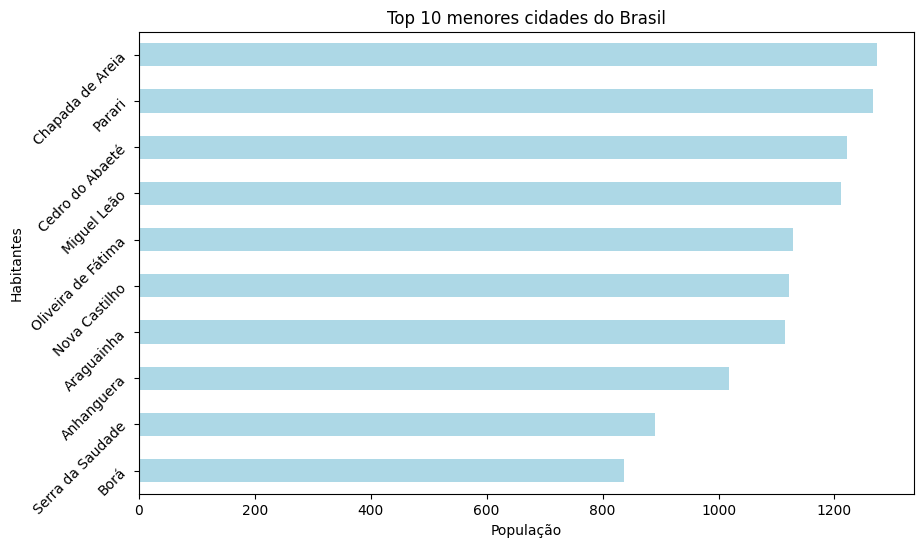

In [25]:
# usando .plot para transformar o df anterior num gráfico
grafico1 = pop_cidades_min.plot(kind='barh', x='nome', y='Pop_est_2009', color='lightblue', legend=False, rot=45, figsize=(10,6))
grafico1.set_title('Top 10 menores cidades do Brasil')
grafico1.set_xlabel('População')
grafico1.set_ylabel('Habitantes')


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

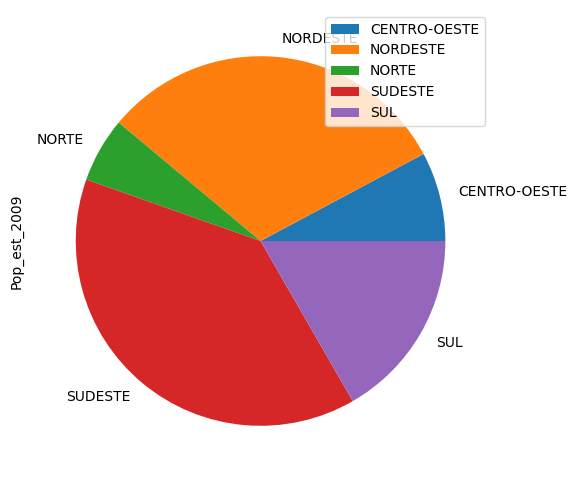

In [26]:
# utilizando o .plot.pie já com os filtros no próprio parametro
grafico2 = brasil_df[['regiao','Pop_est_2009']].groupby('regiao').agg('sum').plot.pie(y='Pop_est_2009', figsize=(10,6))